✅ Data loaded: (129146, 15)
   user_id          signup_time        purchase_time  purchase_value  \
0   247547  2015-06-28 03:00:34  2015-08-09 03:57:29              47   
1   220737  2015-01-28 14:21:11  2015-02-11 20:28:28              15   
2   390400  2015-03-19 20:49:09  2015-04-11 23:41:23              44   
3    69592  2015-02-24 06:11:57  2015-05-23 16:40:14              55   
4   174987  2015-07-07 12:58:11  2015-11-03 04:04:30              51   

       device_id  source browser sex  age   ip_address  class    ip_int  \
0  KIXYSVCHIPQBR     SEO  Safari   F   30    1.0.6.112      0  16778864   
1  PKYOWQKWGJNJI     SEO  Chrome   F   34   1.0.253.61      0  16842045   
2  LVCSXLISZHVUO     Ads      IE   M   29    1.1.3.136      0  16843656   
3  UHAUHNXXUADJE  Direct  Chrome   F   30  1.2.118.236      0  16938732   
4  XPGPMOHIDRMGE     SEO  Chrome   F   37  1.2.248.208      0  16971984   

   lower_bound_ip_address  upper_bound_ip_address transaction_country  
0              1

C:\Users\Firaol\AppData\Local\Temp\ipykernel_27904\4274218925.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='viridis')


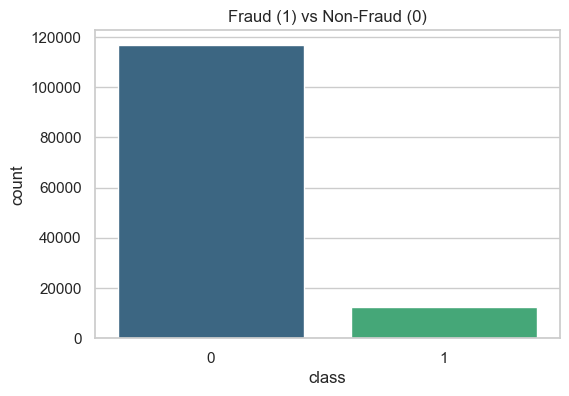

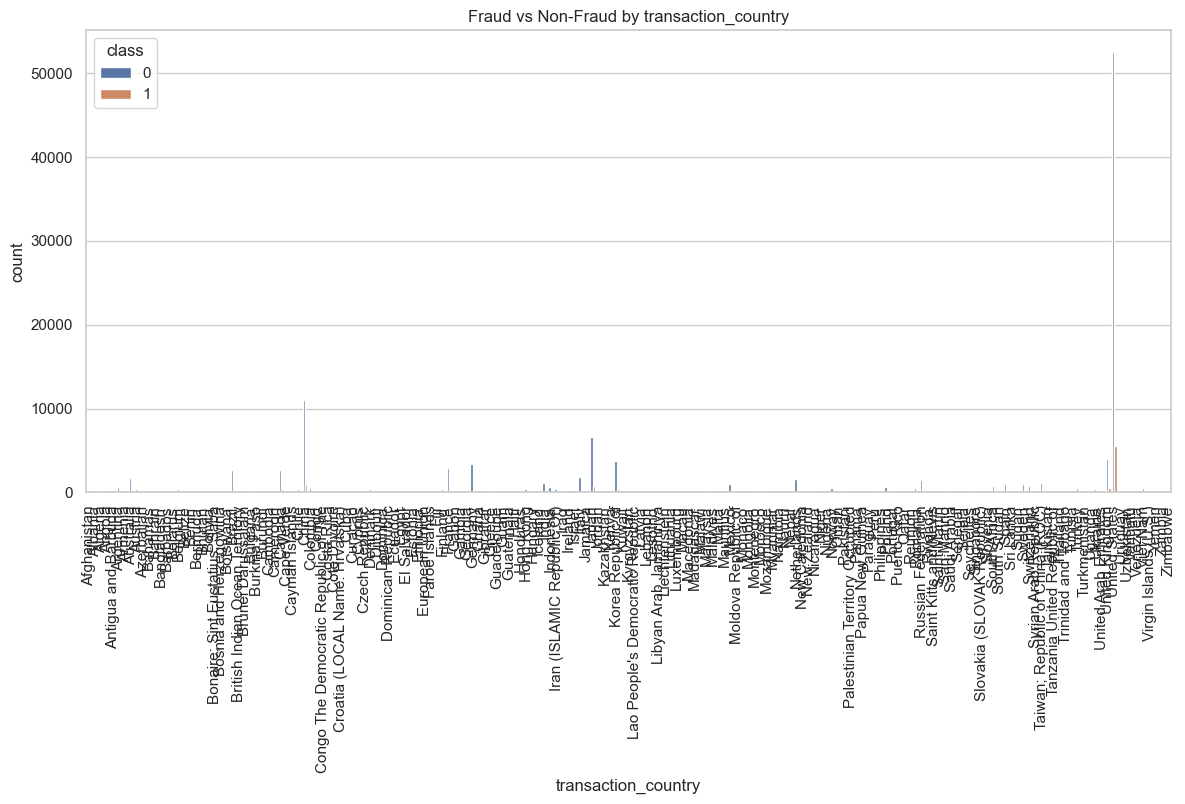

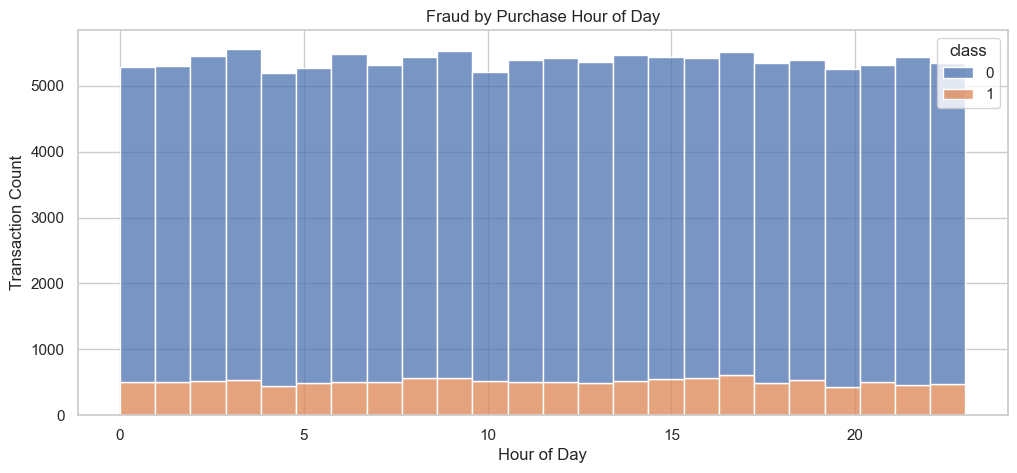

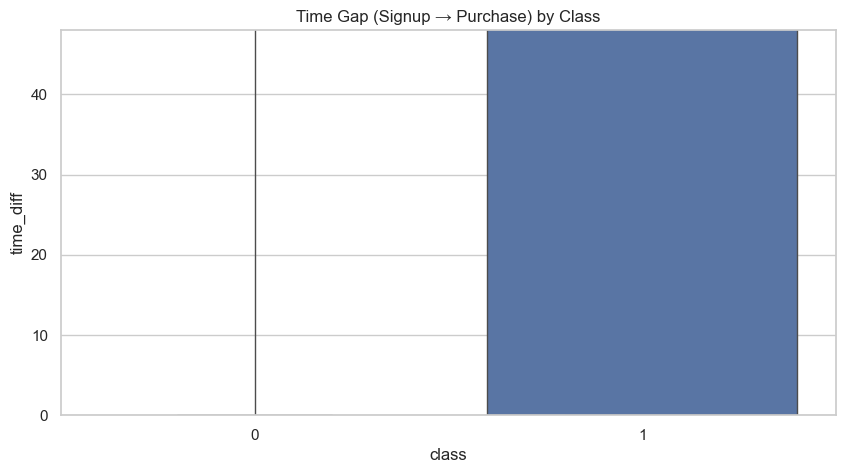

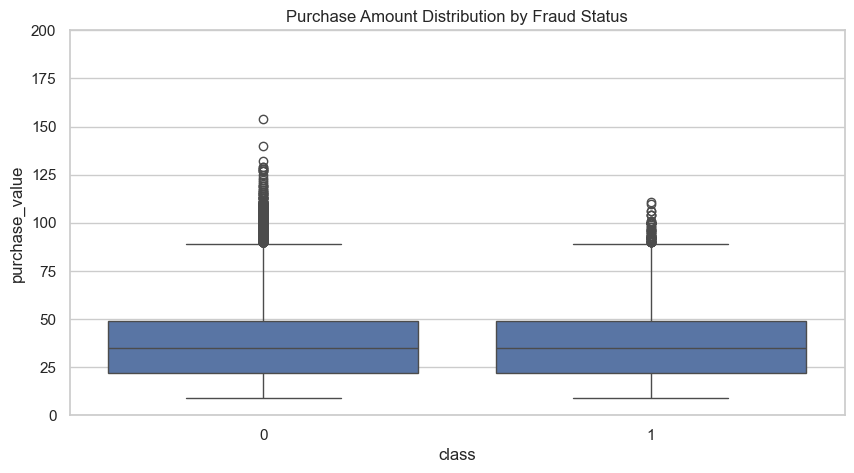

In [10]:
# notebooks/02_fraud_data_eda.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

# =====================
# 1. Load merged dataset
# =====================
df = pd.read_csv("D:/PYTHON PROJECTS/Dual-Channel-Fraud-Detection-System-for-E-Commerce-Banking/Data/merged_data.csv")

print("✅ Data loaded:", df.shape)
print(df.head())

# =====================
# 2. Basic info
# =====================
print("\nInfo:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())

print("\nFraud distribution:")
print(df['class'].value_counts(normalize=True))

plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df, palette='viridis')
plt.title("Fraud (1) vs Non-Fraud (0)")
plt.show()

# =====================
# 3. Fraud by transaction_transaction_transaction_transaction_transaction_transaction_country
# =====================
plt.figure(figsize=(14,6))
transaction_country_counts = df.groupby(['transaction_country', 'class']).size().reset_index(name='count')
sns.barplot(x='transaction_country', y='count', hue='class', data=transaction_country_counts)
plt.xticks(rotation=90)
plt.title("Fraud vs Non-Fraud by transaction_country")
plt.show()

# =====================
# 4. Fraud by purchase hour
# =====================
df['purchase_time'] = pd.to_datetime(df['purchase_time'])
df['purchase_hour'] = df['purchase_time'].dt.hour

plt.figure(figsize=(12,5))
sns.histplot(df, x='purchase_hour', hue='class', multiple='stack', bins=24)
plt.title("Fraud by Purchase Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Transaction Count")
plt.show()

# =====================
# 5. Fraud by signup-purchase gap
# =====================
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['time_diff'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds() / 3600  # hours

plt.figure(figsize=(10,5))
sns.boxplot(x='class', y='time_diff', data=df)
plt.ylim(0, 48)  # zoom into first 2 days
plt.title("Time Gap (Signup → Purchase) by Class")
plt.show()

# =====================
# 6. Fraud by purchase amount
# =====================
plt.figure(figsize=(10,5))
sns.boxplot(x='class', y='purchase_value', data=df)
plt.ylim(0, 200)  # zoom into reasonable range
plt.title("Purchase Amount Distribution by Fraud Status")
plt.show()
